# #Learn_and_import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweet_df=pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/train.csv")

In [3]:
tweet_df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweet_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
tweet_df['tweet'].head(10)

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

In [7]:
tweet_df=tweet_df.drop(columns=['id'])

In [8]:
tweet_df.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


# #Explore the Data

In [9]:
tweet=tweet_df['tweet']
label=tweet_df['label']

(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

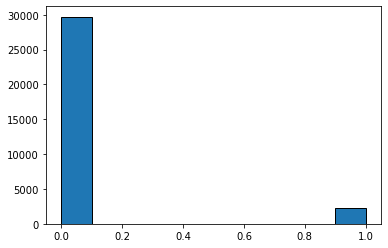

In [10]:
plt.hist(label,bins=10,edgecolor='black')

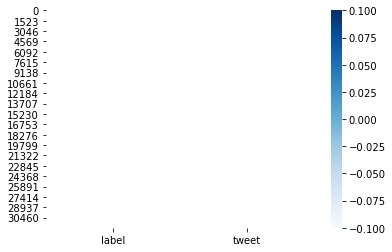

In [11]:
sns.heatmap(tweet_df.isnull(), 
            fmt="d", 
            linewidths=.5, 
            cmap='Blues');

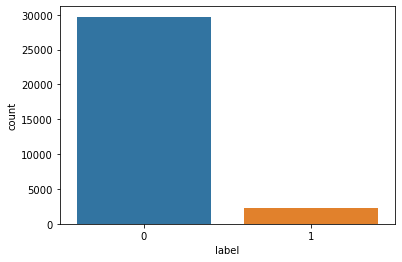

In [12]:
sns.countplot(x='label',data=tweet_df)

# #Add_a_new_column

In [13]:
tweet_df['length']=tweet_df['tweet'].apply(len)

In [14]:
tweet_df.head(2)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122


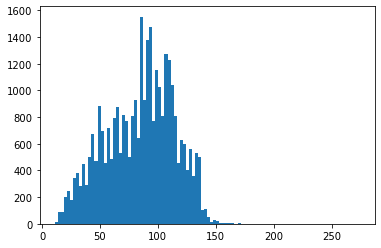

In [15]:
plt.hist(x=tweet_df['length'],bins=100)
plt.show()

In [16]:
tweet_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [17]:
tweet_df[tweet_df['length']==84]['tweet'].iloc[0:100]
    

43      my mom shares the same bihday as @user   bihda...
220     g o a l s ð repost from @user #propey #ocea...
640     oscar tabarez talks luis suarezâs angry reac...
723      @user another hands &amp; feet complete!! ber...
742     because great things never came from comfo zon...
                              ...                        
7943    #things making me    #blacksabbath #berlin #th...
8326    @user @user @user @user @user  @user way to ru...
8388     @user first official ironman 70.3 tomorrow an...
8408    across or a-cross  #cross #flowers #flowerlove...
8445     â #usd/chf hits new session highs amid risk...
Name: tweet, Length: 100, dtype: object

# #split_the_trainData

In [18]:
positive=tweet_df[tweet_df['label']==0]
negative=tweet_df[tweet_df['label']==1]

In [19]:
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


In [20]:
tweet_df['tweet'].iloc[13]

"@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  "

# #FunWithWordcloud

In [21]:
from wordcloud import WordCloud

In [22]:
tweet_sentence=" ".join(tweet)

<Figure size 3600x2880 with 0 Axes>

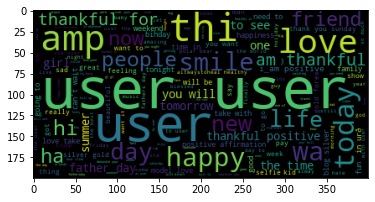

<Figure size 3600x2880 with 0 Axes>

In [23]:
plt.imshow(WordCloud().generate(tweet_sentence))
plt.figure(figsize=(50,40))

In [24]:
negative_sentence=negative['tweet'].tolist()

In [25]:
negative_sentence=" ".join(negative_sentence)

<Figure size 3600x2880 with 0 Axes>

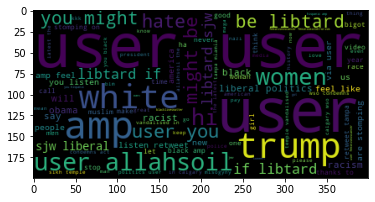

<Figure size 3600x2880 with 0 Axes>

In [26]:
plt.imshow(WordCloud().generate(negative_sentence))
plt.figure(figsize=(50,40))

# #CleanYourData

In [27]:
#remove the punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
tweet_rem=[]
for line in tweet:
    line=''.join([char for char in line if char not in string.punctuation])
    tweet_rem.append(line)

In [29]:
tweet_rem

[' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run',
 'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked',
 '  bihday your majesty',
 'model   i love u take with u all the time in urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide society now    motivation',
 '22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo  ',
 ' user camping tomorrow user user user user user user user dannyâ\x80¦',
 'the next school year is the year for examsð\x9f\x98¯ cant think about that ð\x9f\x98\xad school exams   hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers  â\x80¦ ',
 ' user user welcome here   im   its so gr8  ',
 ' â\x86\x9d ireland consumer price index mom climbed from previous 02 to 05 in may   b

In [30]:
tweet_df['no_punc']=tweet_rem

In [31]:
tweet_df

,label,tweet,length,no_punc
0,0,@user when a father is dysfunctional and is s...,102,user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,39,factsguide society now motivation
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,ate user isz that youuuðððððð...
31958,0,to see nina turner on the airwaves trying to...,131,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,63,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,user sikh temple vandalised in in calgary wso ...


# #Remove_stop_words

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
twitter_nostop=[]
for line in tweet_df['no_punc']:
    twitter_stop=' '.join([ i for i in line.split() if i.lower() not in stopwords.words('english')])
    twitter_nostop.append(twitter_stop)
twitter_nostop

['user father dysfunctional selfish drags kids dysfunction run',
 'user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide society motivation',
 '22 huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'user camping tomorrow user user user user user user user dannyâ\x80¦',
 'next school year year examsð\x9f\x98¯ cant think ð\x9f\x98\xad school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers â\x80¦',
 'user user welcome im gr8',
 'â\x86\x9d ireland consumer price index mom climbed previous 02 05 may blog silver gold forex',
 'selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'get see daddy today 80days gettingfed',
 'user cnn calls michigan mid

In [34]:
tweet_df['no_stop_punc']=twitter_nostop

In [35]:
tweet_df

,label,tweet,length,no_punc,no_stop_punc
0,0,@user when a father is dysfunctional and is s...,102,user when a father is dysfunctional and is so...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit i cant use ca...,user user thanks lyft credit cant use cause do...
2,0,bihday your majesty,21,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,86,model i love u take with u all the time in u...,model love u take u time urð± ðððð...
4,0,factsguide: society now #motivation,39,factsguide society now motivation,factsguide society motivation
...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,ate user isz that youuuðððððð...,ate user isz youuuððððððð...
31958,0,to see nina turner on the airwaves trying to...,131,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,0,listening to sad songs on a monday morning otw...,63,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,user sikh temple vandalised in in calgary wso ...,user sikh temple vandalised calgary wso condem...


# #Vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
sample=["Hi this is py monkey to soon","monkey lays for a reporting", "reporting!! can you come back to me soon"]

In [37]:
vectorizer=CountVectorizer()

In [38]:
x=vectorizer.fit_transform(sample)

In [39]:
print(x.toarray())

[[0 0 0 0 1 1 0 0 1 1 0 1 1 1 0]
 [0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
 [1 1 1 0 0 0 0 1 0 0 1 1 0 1 1]]


In [40]:
print(vectorizer.get_feature_names())

['back', 'can', 'come', 'for', 'hi', 'is', 'lays', 'me', 'monkey', 'py', 'reporting', 'soon', 'this', 'to', 'you']


# #message_cleaning_pipeline

In [41]:
def message_cleaning(message):
    test_punc_removed=[char for char in message if char not in  string.punctuation]
    test_punc_removed_join=''.join(test_punc_removed)
    test_punc_stop_removed=[word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_stop_removed


In [42]:
tweet_df['clean_tweet']=tweet_df['tweet'].apply(message_cleaning)

In [43]:
tweet_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [44]:
tweetvectorizer=CountVectorizer(analyzer=message_cleaning).fit_transform(tweet_df['tweet']).toarray()

In [45]:
tweetvectorizer.shape

(31962, 47386)

In [46]:
x=tweetvectorizer
y=tweet_df['label']

In [47]:
y=tweet_df['label']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,yp_test = train_test_split(x,y,test_size=0.3)

In [49]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [50]:
ypred_test=NB_classifier.predict(x_test)

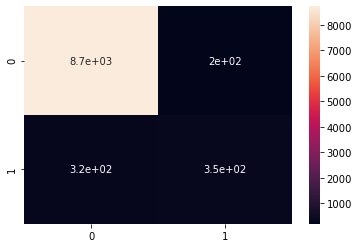

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(yp_test,ypred_test)
sns.heatmap(cm,annot=True)

In [52]:
print(classification_report(yp_test,ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8924
           1       0.63      0.52      0.57       665

    accuracy                           0.95      9589
   macro avg       0.80      0.75      0.77      9589
weighted avg       0.94      0.95      0.94      9589

